<a href="https://colab.research.google.com/github/nitishast/TF/blob/master/Functional_API_model_California_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import matplotlib as mp
import tensorflow as tf
from tensorflow import keras
import scipy
from sklearn.datasets import fetch_california_housing


TensorFlow 2.x selected.


In [0]:
housing = fetch_california_housing()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)


In [0]:
from keras.models import Sequential


## Two type of networks Multilayer and Wide &  Deep.

Lets make a wide and deep model. A wide model connects all or parts of input layer directly to output layer.
> It makes the network to learn simple patter using wide(short path) and deep paterns using deep layers(deep path). 

>A simple MLP passes all the input through stack of layers henc patters can be slighlty distorted or lost in moving from input to output layers. 

In [0]:
## This is a functional API of Keras. We will call each layer with the output of previous layer.
## Once this is has been done, model can be compiled and evaluated.

input = keras.layers.Input(shape=X_train.shape[1:])#Defining an input shape. This shape can be different also if we want to train the model on a subset of dat.a
#Input layer just accepts the input and not the data actually. 
hidden1 = keras.layers.Dense(30,activation="relu")(input) # Calling the first dense layer with the input layer as a Function call hence the fuctional API.
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)# Next hidden layer accpets the output of first hidden layer.

concat = keras.layers.concatenate([input,hidden2]) # Using this method we can send the input data and output of hidden layer directly to output layer.
output = keras.layers.Dense(1)(concat)# Just using one neuron as just need one output value. No activation func as one conti variable. 

model = keras.models.Model(inputs=[input],outputs=[output]) # Compile this using both input and output layer



In [0]:
model.compile(loss='mse',optimizer="sgd")

In [0]:
model.summary()

In [0]:
model.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_valid,y_valid))

In [0]:
los = pd.DataFrame(model.history.history)
los.plot()

In [0]:
model.evaluate(X_test,y_test)

### By Functional API and input layer, subset can be used for training. 
Ex: A set of 5 feature from [0,1] and another subset of 6 feature from [2,7]
One input is send to Output layer and other input is used to for stacking.

In [3]:
X_train.shape

(11610, 8)

In [0]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model1 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [0]:
model1.compile(loss='mean_squared_error',optimizer='sgd')

In [16]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
____________________________________________________________________________________________

### While using fit method we should use the two subset as split in layers.


In [0]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]


In [17]:
history = model1.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 106us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 1s 89us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 1s 89us/sample - loss: nan - val_loss: nan
Epoch 4/20
 3232/11610 [=======>......................] - ETA: 0s - loss: nan

KeyboardInterrupt: ignored

In [0]:
los1 = pd.DataFrame(model1.history.history)

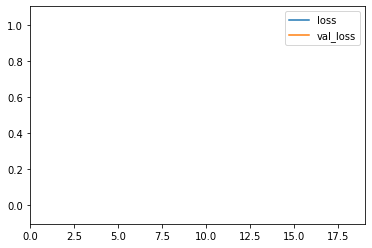

In [11]:
los1.plot()

In [12]:
model1.evaluate((X_test_A,X_test_B),y_test)

5160/5160 [==============================] - 0s 64us/sample - loss: nan


nan

In [13]:
model1.predict(X_new_A,X_new_B)

ValueError: ignored